<a href="https://colab.research.google.com/github/YuliiaUtkina/Git_modul_pyhton/blob/main/Final_Project_Grocery_store_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ВСТУП**

---



# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau!
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Ось так можемо переглянути, які є листки в Excel файлі:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '/content/drive/MyDrive/Grocery_Database.xlsx'

In [ ]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [ ]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [ ]:
df = pd.read_excel(path_to_file)

In [ ]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх,
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно**

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql.

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga.
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

**Завантаження та початкова обробка даних**

---

Перевірка структури даних, наявності пропущених значень, за який період вибірка - чи достатньо даних для аналізу.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50447 entries, 0 to 50446
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Receipt Number       50447 non-null  object        
 1   Date                 50447 non-null  datetime64[ns]
 2   Year                 50447 non-null  int64         
 3   Month                50447 non-null  int64         
 4   Time                 50447 non-null  object        
 5   Mobile Number        50447 non-null  int64         
 6   Membership ID        50447 non-null  object        
 7   Loyalty Card Points  50447 non-null  int64         
 8   Age                  50447 non-null  int64         
 9   Gender               50447 non-null  object        
 10  City                 50447 non-null  object        
 11  Country              50447 non-null  object        
 12  Category             50447 non-null  object        
 13  Sub_Category         50447 non-

In [ ]:
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 100)
df[:10]

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,Jakarta,Indonesia,"Choco, Snacks, Sweets",Biscuits & Crackers,Oreo mini oreo sharepack,Oreo,540 g,3.09,4,0.02,12.1128,12.1128,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,Jakarta,Indonesia,"Wines, Beers & Spirits",Beer,Ashai Lager Beer,Ashai,480 ml,11.60,2,0.01,22.9680,22.9680,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Frozen Fruits,Cascadian farm organic strawberries,Cascadiam Farm,1 Kg,13.31,1,0.01,13.1769,38.3526,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,Oraganic 4 Life Red onions,Organic 4 Life,270 g,3.52,1,0.01,3.4848,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,LIVEWELL Italian mesclun salad,LIVEWELL,570 g,4.41,1,0.01,4.3659,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
5,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Lettuce & Salads,ThyGrace Romanine lettuce,ThyGrace,100 g,2.81,1,0.01,2.7819,38.3526,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.33720,0.4215,2.05130
6,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,3,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,YUVVO French Bean,YUVVO,260 g,3.28,1,0.01,3.2472,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.31160,0.4920,2.47640
7,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,4,16,Female,Jakarta,Indonesia,Fruit & Vegetable,Fresh Vegetables,ThyGrace Holland potato,ThyGrace,690 g,3.75,1,0.01,3.7125,38.3526,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.35625,0.5625,2.83125
8,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,0,20,Female,Jakarta,Indonesia,Pet Care,Dog Food & Trat,Lamb pate dog food,Nature's Gift,600 g,5.84,1,0.02,5.7232,21.1974,0.1,23.31714,Cash,BDO Unibank,0.148,0.15,0.702,0.86432,0.8760,4.09968
9,GIJ00004,2016-01-03,2016,1,20:52:55.730000,9800896004,MIDID0004,1,20,Female,Jakarta,Indonesia,Pet Care,Pet Food,Nutro Beef with vegetables dog food,Nutro,270 g,7.30,1,0.02,7.1540,21.1974,0.1,23.31714,Cash,BDO Unibank,0.076,0.15,0.774,0.55480,1.0950,5.65020


In [ ]:
df.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [ ]:
start_date = df['Date'].min()
end_date = df['Date'].max()
print(f"Вибірка даних охоплює період з {start_date.date()} по {end_date.date()}")

Вибірка даних охоплює період з 2016-01-01 по 2019-12-31


**1 Питання. Дослідимо категорії продуктів за популярністю покупок**

In [ ]:
print(df.Category.value_counts(ascending=False))

Category
Bakery & Breakfast           6770
Frozen                       6393
Beauty                       5205
Fruit & Vegetable            4370
Pet Care                     3465
Dairy, Chilled & Eggs        3381
Choco, Snacks, Sweets        3019
Kitchen & Dining             2552
Rice & Cooking Essentials    2432
Beverages                    2208
Meat & Seafood               2149
Mother & Baby                2064
Household                    1881
Party Supplies               1836
Wines, Beers & Spirits       1714
Health                       1008
Name: count, dtype: int64


*Висновок: Найпопулярнішими категоріями продуктів є хлібобулочні віроби, заморожені продукти, товари догляду та краси.*




**2 Питання: Подивимось, яка категорія товарів приносить найбільші продажі**

Для цього додамо стовпчик, який буде рахувати суму по купленій позиції, включаючи податок:

In [ ]:
df['Gross Bill Amount Sales'] = (df['Price'] * df['QTY'] * (1 - df['DISC']) * (1 + df['GST'])).round(2)

In [ ]:
most_profitable_category_pivot = df.pivot_table(index='Category',
                                      values='Gross Bill Amount Sales',
                                      aggfunc='sum').sort_values(by='Gross Bill Amount Sales', ascending=False)

print(most_profitable_category_pivot)

                           Gross Bill Amount Sales
Category                                          
Beauty                                    85923.85
Frozen                                    80618.09
Bakery & Breakfast                        57695.19
Meat & Seafood                            42271.59
Fruit & Vegetable                         39889.47
Mother & Baby                             39697.94
Pet Care                                  38765.90
Dairy, Chilled & Eggs                     38466.36
Wines, Beers & Spirits                    37595.52
Beverages                                 29348.15
Choco, Snacks, Sweets                     28287.52
Household                                 27352.31
Health                                    22134.25
Kitchen & Dining                          15570.09
Rice & Cooking Essentials                 13943.33
Party Supplies                            13842.93


*Висновок: Бачимо, що наші топ категорій, які найчастіше купують, по ним же і набільша виручка.*

М'ясо та морепродукти також приносять високий дохід, хоча по частоті покупок не такі популярні.

Подивимось розподіл об'ємів продаж всередині категорії:

In [ ]:
meat_seafood_gross_bill = df[df['Category'] == 'Meat & Seafood'].groupby('Sub_Category')['Gross Bill Amount Sales'].sum().round(2)

In [ ]:
meat_seafood_gross_bill

Sub_Category
Fresh Meat        16076.21
Fresh Seafood      8582.51
Frozen Meat        4349.13
Frozen Seafood    13263.74
Name: Gross Bill Amount Sales, dtype: float64

У підкатегорії покупають свіже м'ясо та заморожені продукти, що є очікуваним для багатьох країн.

*Висновок: категорія продуктів "Meat & Seafood" має потенціал у підвищенні прибутку шляхом впровадження акцій б проведення рекламних компаній.*

**3 Питання - подивимось, що купують у категорії "Beauty" та побудуємо круговий розподіл**

In [ ]:
beaty_gross_bill = df[df['Category'] == 'Beauty'].groupby('Sub_Category')['Gross Bill Amount Sales'].sum().round(2)

In [ ]:
beaty_gross_bill

Sub_Category
Bath & Body    11479.38
Oral Care      33483.82
skin care      40960.65
Name: Gross Bill Amount Sales, dtype: float64

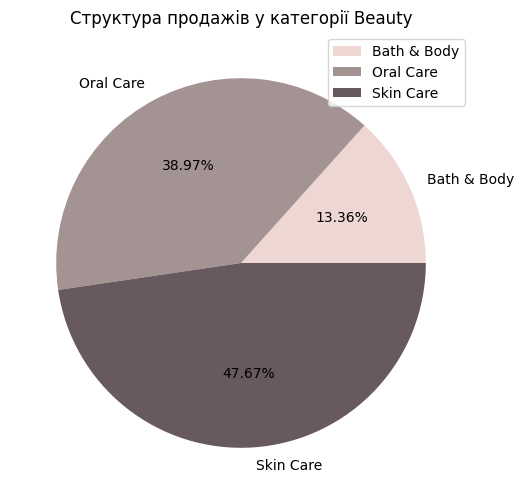

In [ ]:
colors = ['#EED6D3', '#A49393', '#67595E']
labels = ['Bath & Body', 'Oral Care', 'Skin Care']

plt.figure(figsize=(6, 6))
plt.pie(beaty_gross_bill, labels=labels, autopct='%1.2f%%', colors=colors)
plt.title('Структура продажів у категорії Beauty')
plt.legend(labels, loc="upper right")
plt.show()

*Висновок: найбільш популярні товари у категорії "Beauty" - товари по догляду за шкірою.*

**4 Питання: Подивимось категорії, які купуються рідше проте за рахунок високої ціни мають більший прибуток**

In [ ]:
category_stats = df.groupby('Category').agg(
    num_purchases=('Items', 'count'),
    avg_profit_margin=('Profit Margin', 'mean')
).reset_index()
category_stats['avg_profit_margin'] = category_stats['avg_profit_margin'].round(3)

print(category_stats)

                     Category  num_purchases  avg_profit_margin
0          Bakery & Breakfast           6770              0.919
1                      Beauty           5205              1.535
2                   Beverages           2208              1.091
3       Choco, Snacks, Sweets           3019              0.980
4       Dairy, Chilled & Eggs           3381              0.789
5                      Frozen           6393              1.449
6           Fruit & Vegetable           4370              1.004
7                      Health           1008              1.761
8                   Household           1881              0.993
9            Kitchen & Dining           2552              0.632
10             Meat & Seafood           2149              1.939
11              Mother & Baby           2064              2.065
12             Party Supplies           1836              0.900
13                   Pet Care           3465              1.289
14  Rice & Cooking Essentials           

Візуалізуємо:

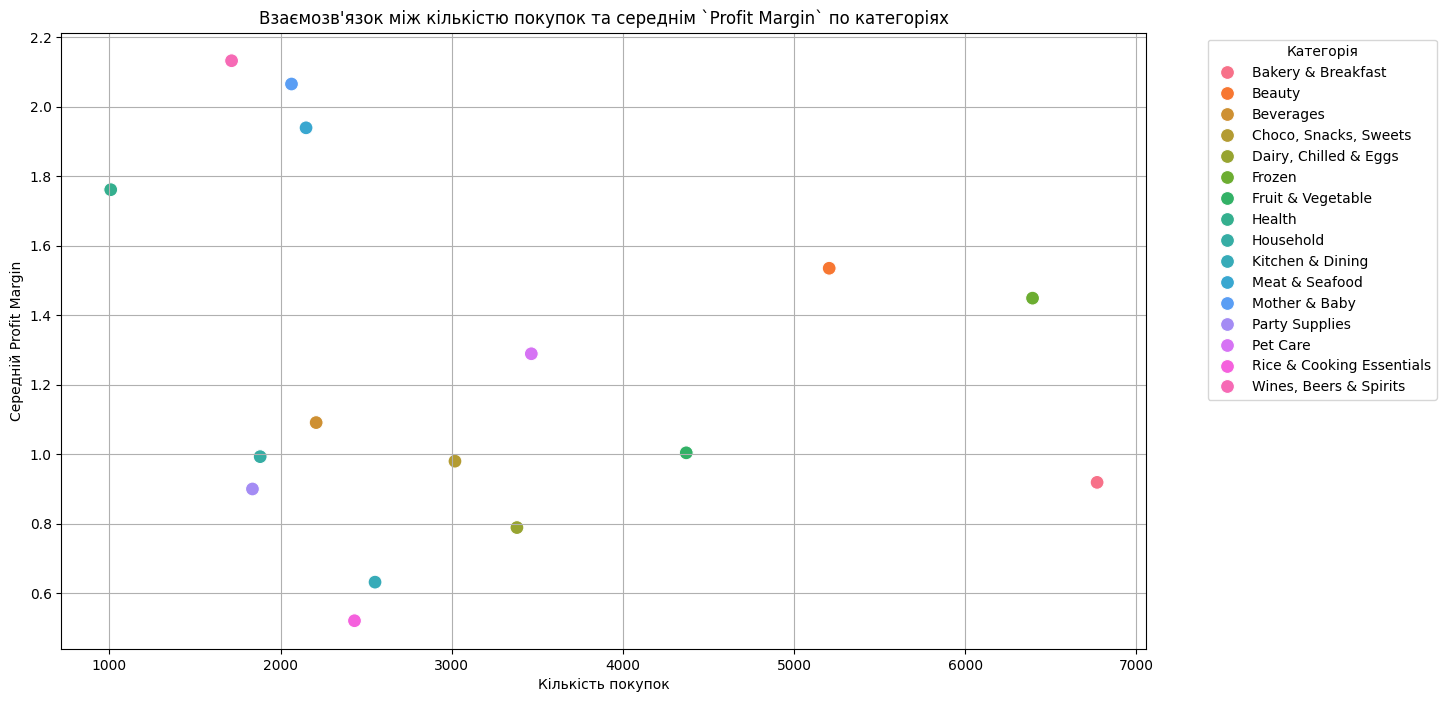

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=category_stats, x='num_purchases', y='avg_profit_margin', hue='Category', s=100)
plt.title('Взаємозв\'язок між кількістю покупок та середнім `Profit Margin` по категоріях')
plt.xlabel('Кількість покупок')
plt.ylabel('Середній Profit Margin')
plt.legend(title='Категорія', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


*Висновок: Категорії з високим Profit Margin і малою кількістю покупок (наприклад, Wines, Beers & Spirits, Mother & Baby, Meat & Seafood) можуть бути високомаржинальними нішами, які варто підтримувати для збільшення загального прибутку.
Категорії з великою кількістю покупок і середньою маржою (наприклад, Bakery & Breakfast, Frozen) є важливими з точки зору обсягу продажів, навіть якщо маржа прибутку не є найвищою.
Категорії з низькою маржою (наприклад, Rice & Cooking Essentials, Kitchen & Dining) можуть вимагати перегляду цінової стратегії або фокусування на зниженні витрат*

**5 Питання - переглянемо розподіл цін у вибірці**

In [ ]:
average_price = df['Price'].mean()
median_price = df['Price'].median()
price_quartiles = df['Price'].quantile([0.25, 0.5, 0.75])

print(f"Середня ціна товару: {average_price}")
print(f"Медіанна ціна товару: {median_price}")
print(f"Квартильні значення цін товарів: \n{price_quartiles}")

Середня ціна товару: 7.4241839950839505
Медіанна ціна товару: 5.98
Квартильні значення цін товарів: 
0.25    4.28
0.50    5.98
0.75    9.47
Name: Price, dtype: float64


Висновок:
Ціни товарів мають значний розкид, оскільки 25% товарів мають ціну нижче 4.28, а 75% - нижче 9.47. Це вказує на те, що більшість цін концентруються в діапазоні від 4.28 до 9.47.
Середня ціна (7.42) вища за медіанну (5.98). Це може свідчити про наявність деяких товарів з дуже високими цінами, які підвищують середню ціну.

Тому нижче побудуємо розподіл цін товарів:

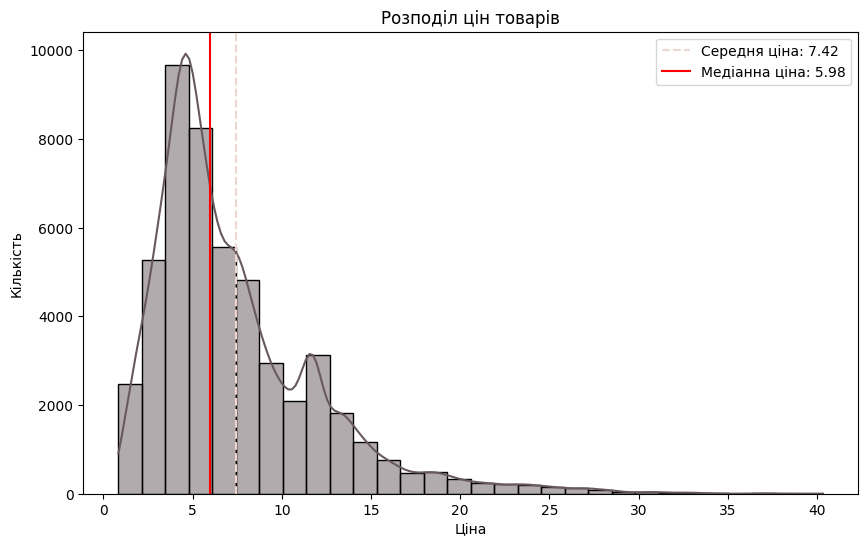

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='#67595E')  # колір гістограми
plt.title('Розподіл цін товарів')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.axvline(average_price, color='#EED6D3', linestyle='--', label=f'Середня ціна: {average_price:.2f}')
plt.axvline(median_price, color='red', linestyle='-', label=f'Медіанна ціна: {median_price:.2f}')
plt.legend()
plt.show()

З розподілу видно, що найбільше купують товари з маленькою ціною.
Подивимось нижче на розподіл виручки:

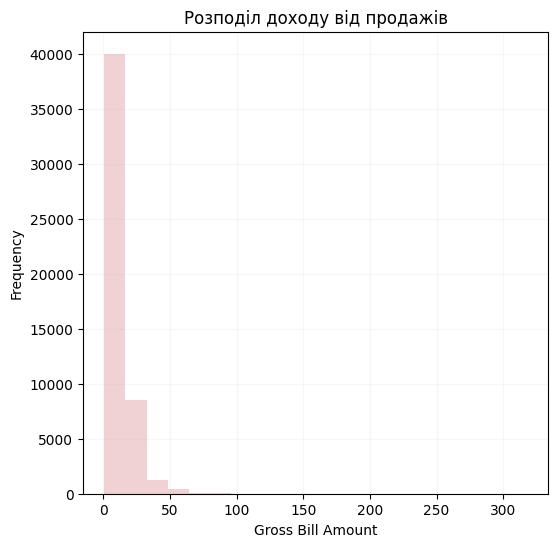

In [ ]:
income = df['Gross Bill Amount Sales'].to_numpy()
plt.figure(figsize=(6, 6))
plt.hist(x=income, bins=20, alpha=0.6, color='#E8B4B8')
plt.grid(axis='both', alpha=0.1)
plt.xlabel('Gross Bill Amount')
plt.ylabel('Frequency')
plt.title('Розподіл доходу від продажів')
plt.show()

*Висновок: більша частина доходу отримується від продажу товарів з найменшими цінами*

6 Питання: Розглянемо розподіл прибутку по категоріях товарів, що мають найбільші продажі (топ 3) і побудуємо гістограму

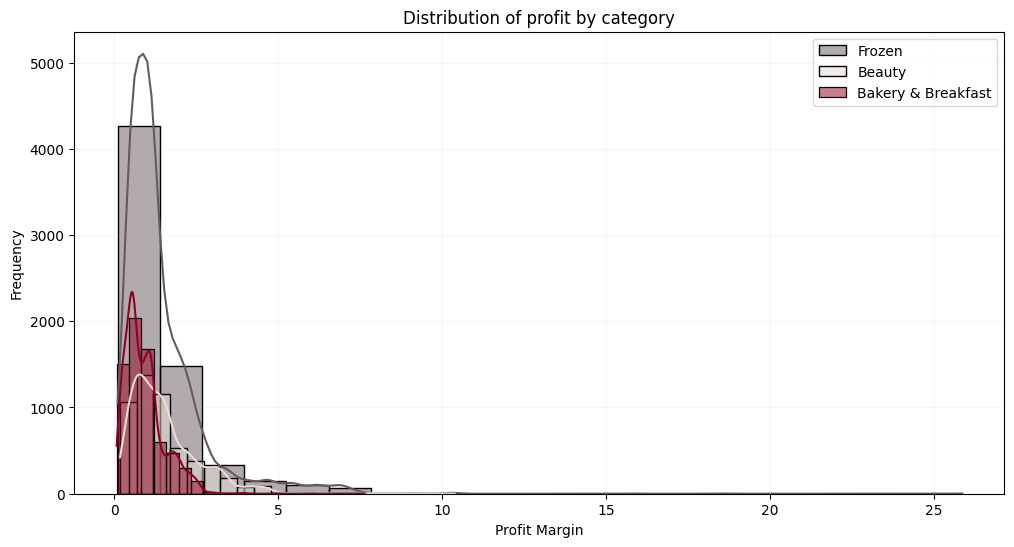

In [ ]:
top_profitable_category = ['Frozen', 'Beauty', 'Bakery & Breakfast']
colors = ['#67595E', '#E9DDD4', '#900020']


plt.figure(figsize=(12, 6))
for category, color in zip(top_profitable_category, colors):
    sns.histplot(data=df[df['Category'] == category], x='Profit Margin', bins=20, kde=True, color=color, label=category)


plt.legend()
plt.grid(axis='both', alpha=0.1)
plt.title('Distribution of profit by category')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.show()

*Висновок: не дивлячись на те, що найбильший дохід приносить категорія "Beauty", проте більший прибуток отримується з категорії заморожені вироби з топ 3 продажів.*

**7 Питання: вище дізнались, що категорія з алкогольними товарами приносить високі прибутки, перевіримо їх ціни - за логікою вони повинні бути найвищі. Виведемо ТОП -20**

In [ ]:
df[['Items', 'Category', 'Sub_Category','Price']].sort_values(by = 'Price', ascending = False)[:20]

,Items,Category,Sub_Category,Price
3943,Villa Sandi imperial champagne,"Wines, Beers & Spirits",Champagne & Spakling Wine,40.33
18446,Rothschild Cuvee brut champagne,"Wines, Beers & Spirits",Champagne & Spakling Wine,40.07
19785,Bollinger Pink platted moscato rose,"Wines, Beers & Spirits",Champagne & Spakling Wine,39.04
45108,Monster Energy Drink,Health,Sports Nutrition,38.31
47466,Monster Energy Drink,Health,Sports Nutrition,38.31
33416,Bottega Brut Champagne,"Wines, Beers & Spirits",Champagne & Spakling Wine,37.37
22460,Monster Energy Drink,Health,Sports Nutrition,36.99
29601,Monster Energy Drink,Health,Sports Nutrition,36.99
28721,Monster Energy Drink,Health,Sports Nutrition,36.99
11881,Monster Energy Drink,Health,Sports Nutrition,36.99


*Висновок: підвищити прибуток можна за рахунок збільшення продажів у категорії алкогольних напоїв - шляхом промоакції, реклами, розширення продуктової лінійки, як наприклад розширити полку аналогами продукту шампанських вин Villa Sandi imperial champagne*

**8 питання: Розглянемо продажі і прибуток у розрізі країн**

In [ ]:
sales_profit_by_country_city = df.groupby(['Country', 'City']).agg(
     total_gross_sales=('Gross Bill Amount Sales', 'sum'),
    total_profit_margin=('Profit Margin', 'sum')
).reset_index().round(2)
print(sales_profit_by_country_city)

       Country          City  total_gross_sales  total_profit_margin
0    Indonesia       Jakarta          113314.91             11068.60
1     Malaysia  Kuala Lumpur          128491.51             12958.12
2  Philippines        Manila          150065.22             14455.63
3    Singapore         Bedok          145160.76             14649.60
4    Singapore     Woodlands           74370.09              7489.30


*Висновок: Найбільше продажів було здійснено у Філіпінах та Сінгапурі.
Маніла має найкращі показники за загальними продажами та прибутковістю серед наведених міст.  Це може бути через більший ринок або сильнішу економіку в цьому місті.
Сінгапур (Bedok) менше продажів, але більше прибуток. Це може свідчити про те, що в Bedok менше витрат.
Сінгапур (Woodlands) має найнижчі показники як за продажем, так і за прибутком. Це може бути через вищу конкуренцію або більші витрати на ведення бізнесу в цьому районі, що зменшує прибутковість.*

**9 Питання: Подивимось на активну базу клієнтів в тоталі і побудуємо помісячну динаміку DAU, WAU, MAU**

In [ ]:
customers = df['Membership ID'].unique()
print(f'{len(customers)} - кількість покупців у мережі магазинів')

2601 - кількість покупців у мережі магазинів


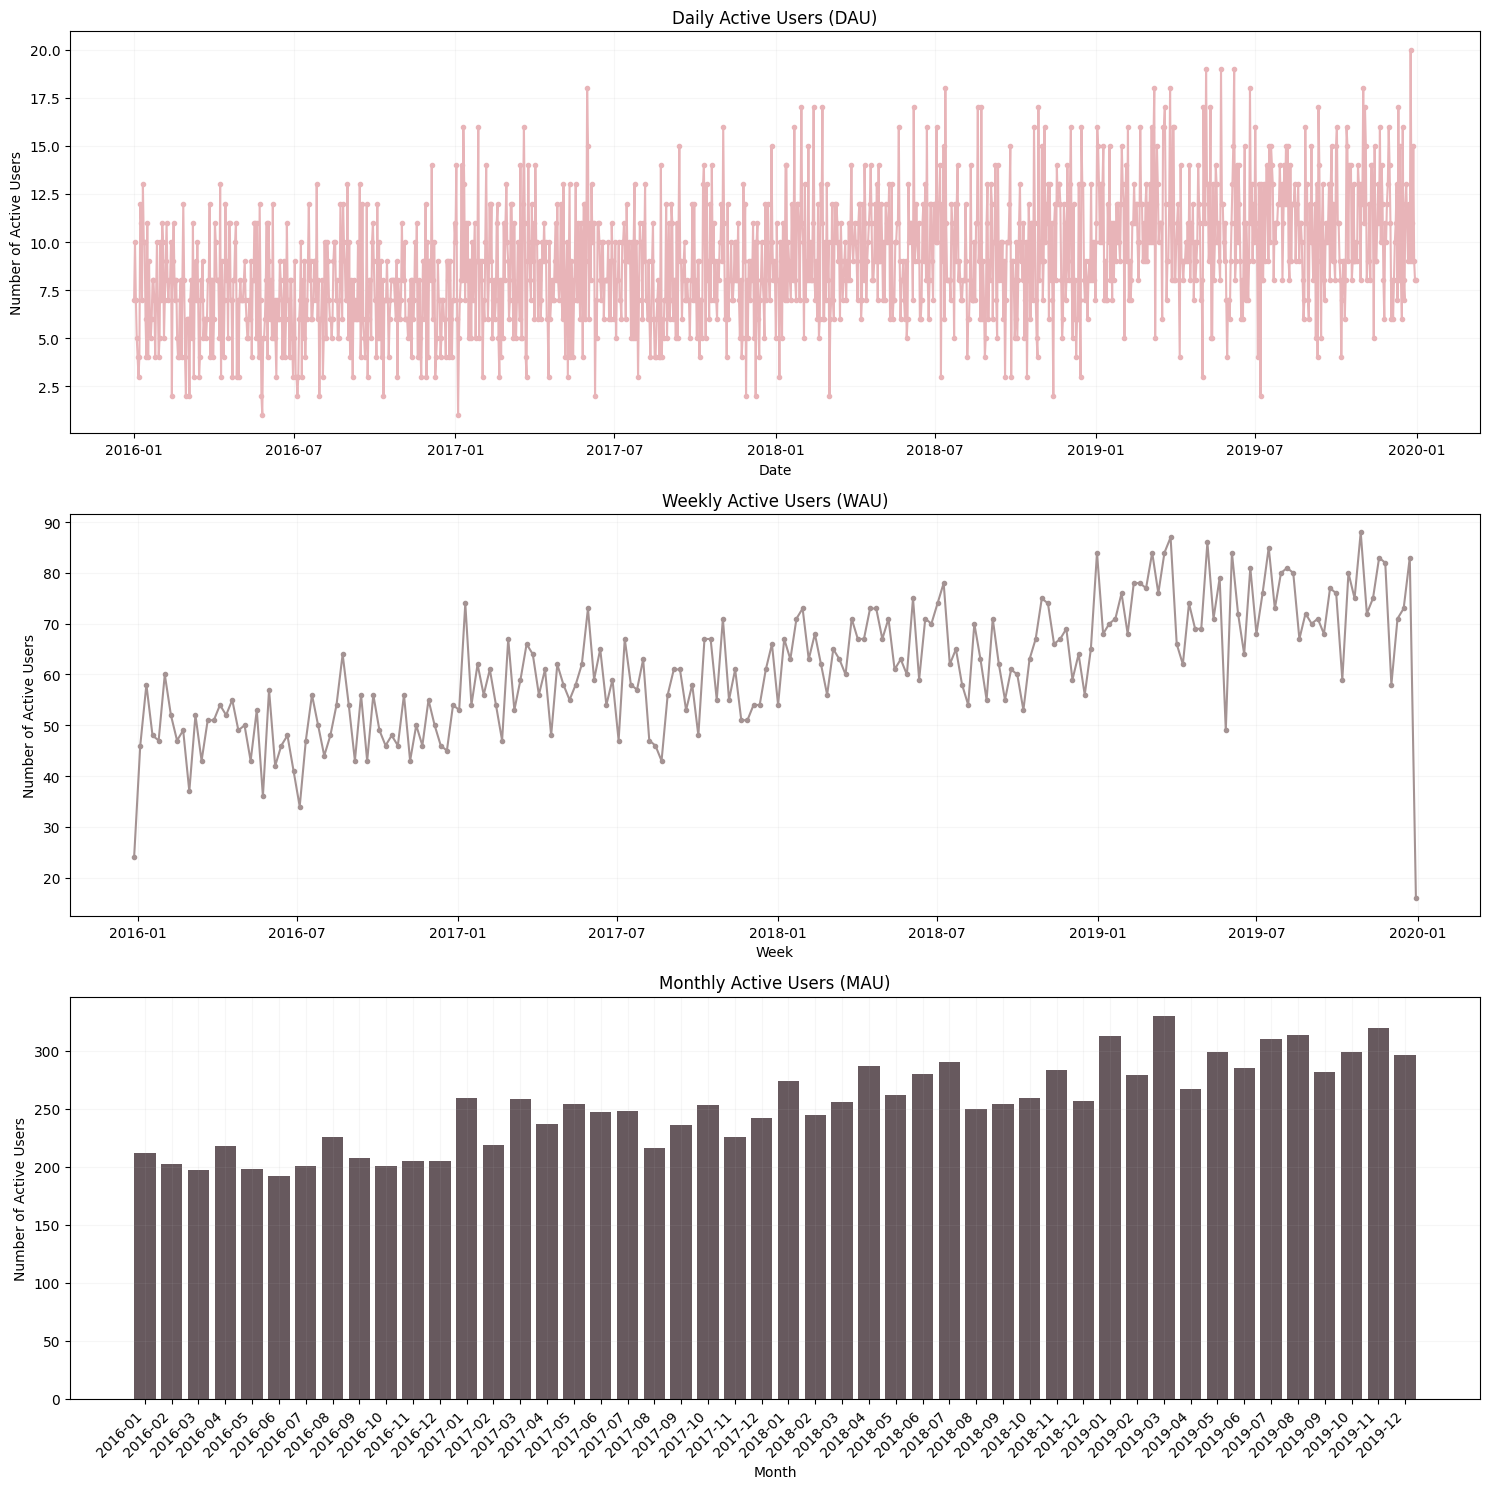

In [34]:
# Daily Active Users (DAU)
dau = df.groupby('Date')['Membership ID'].nunique().reset_index()
dau.columns = ['Date', 'DAU']

# Weekly Active Users (WAU)
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
wau = df.groupby('Week')['Membership ID'].nunique().reset_index()
wau.columns = ['Week', 'WAU']

# Monthly Active Users (MAU)
df['Month'] = df['Date'].dt.to_period('M')
mau = df.groupby('Month')['Membership ID'].nunique().reset_index()
mau.columns = ['Month', 'MAU']


fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Лінійний графік для DAU
axs[0].plot(dau['Date'], dau['DAU'], marker='o', linestyle='-', color='#E8B4B8', markersize=3)
axs[0].set_title('Daily Active Users (DAU)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Active Users')
axs[0].grid(True, alpha=0.1)

# Лінійний графік для WAU
axs[1].plot(wau['Week'], wau['WAU'], marker='o', linestyle='-', color='#A49393', markersize=3)
axs[1].set_title('Weekly Active Users (WAU)')
axs[1].set_xlabel('Week')
axs[1].set_ylabel('Number of Active Users')
axs[1].grid(True, alpha=0.1)

# Гістограма для MAU
axs[2].bar(mau['Month'].astype(str), mau['MAU'], color='#67595E')
axs[2].set_title('Monthly Active Users (MAU)')
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Number of Active Users')
axs[2].grid(True, alpha=0.1)

# Поворот міток на осі X для MAU
plt.setp(axs[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

*Висновок: спостерігаємо приріст щоденної кількості клієнтів, відповідно є помісячне зростання, що говорить про те, що активна база клієнтів зростає*

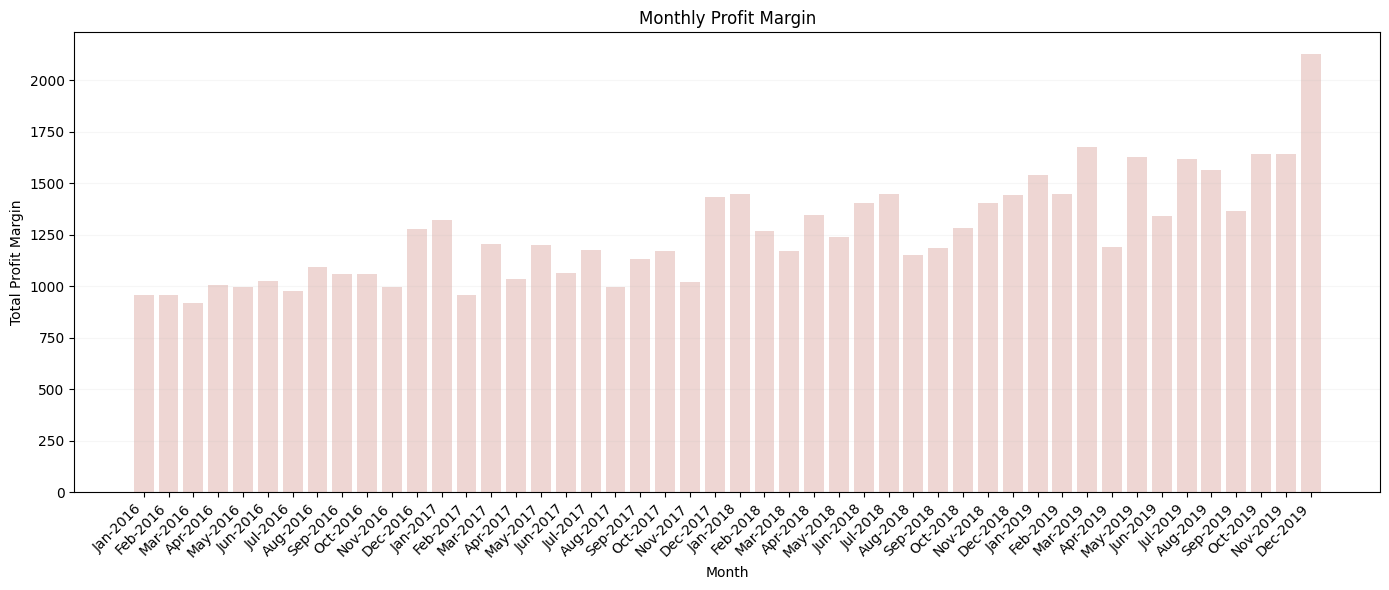

In [37]:
# Групування даних за місяцями
monthly_profit_margin = df.groupby(df['Date'].dt.to_period('M'))['Profit Margin'].sum().reset_index()
monthly_profit_margin['Date'] = monthly_profit_margin['Date'].dt.to_timestamp()
monthly_profit_margin.columns = ['Date', 'Total Profit Margin']

# Побудова гістограми
plt.figure(figsize=(14, 6))
plt.bar(monthly_profit_margin['Date'].dt.strftime('%b-%Y'), monthly_profit_margin['Total Profit Margin'], color='#EED6D3')
plt.title('Monthly Profit Margin')
plt.xlabel('Month')
plt.ylabel('Total Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.1)

# Відображення графіка
plt.tight_layout()
plt.show()

Висновок: в прибутку теж наблюдаємо зростання.
Сезонність не наблюдається, але бачимо зростання у грудні-січні кожного року, що може свідчити про підвищення активності клієнтів під час новорічних свят/канікул

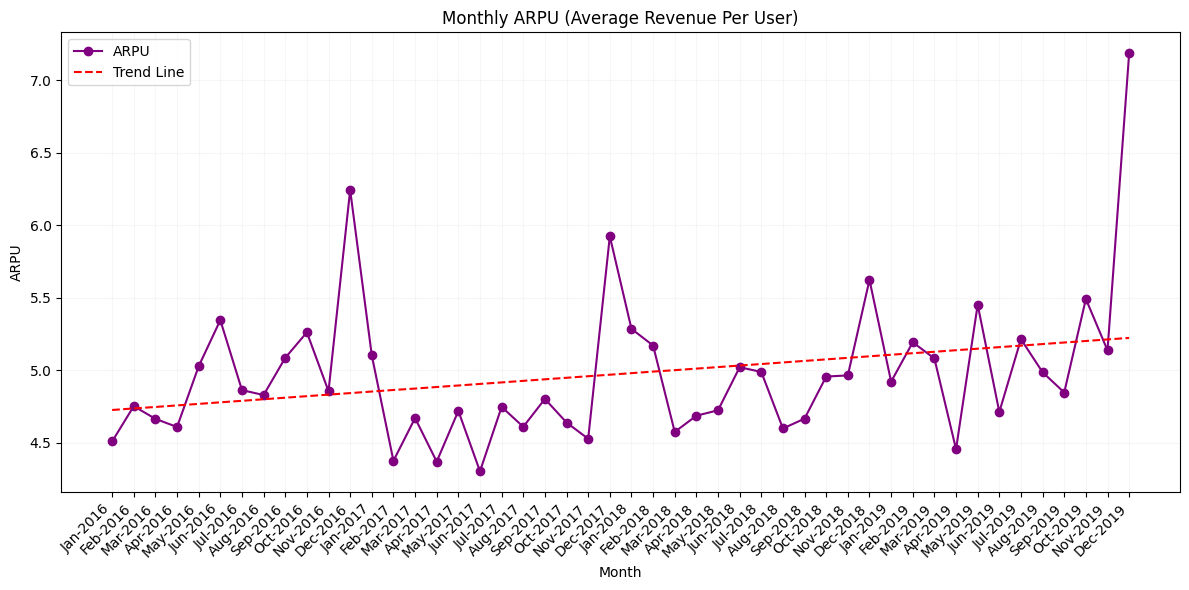

In [38]:
# Сумарний дохід та кількість унікальних користувачів помісячно
monthly_data = df.groupby(df['Date'].dt.to_period('M')).agg({'Profit Margin': 'sum', 'Membership ID': 'nunique'}).reset_index()
monthly_data['Date'] = monthly_data['Date'].dt.to_timestamp()
monthly_data.columns = ['Month', 'Total Profit Margin', 'Unique Users']

# Обчислення ARPU
monthly_data['ARPU'] = monthly_data['Total Profit Margin'] / monthly_data['Unique Users']

# Перетворення періоду місяця у числовий формат для поліноміальної регресії
monthly_data['Month_ordinal'] = monthly_data['Month'].apply(lambda x: x.toordinal())

# Побудова графіка
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'].dt.strftime('%b-%Y'), monthly_data['ARPU'], marker='o', linestyle='-', color='purple', label='ARPU')

# Додавання лінії тренду
z = np.polyfit(monthly_data['Month_ordinal'], monthly_data['ARPU'], 1)
p = np.poly1d(z)
plt.plot(monthly_data['Month'].dt.strftime('%b-%Y'), p(monthly_data['Month_ordinal']), "r--", label='Trend Line')

plt.title('Monthly ARPU (Average Revenue Per User)')
plt.xlabel('Month')
plt.ylabel('ARPU')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.1)
plt.legend()

plt.tight_layout()
plt.show()

*Висновок: таки бачимо, що на новорічні свята сумма чеку клієнтів зростає.*
Протягом 2017 року найнижчий ARPU -тут треба окремо досліджувати причини: подивитись у розрізі країн/міст, можливо були якісь зовнішні фактори (політичні, природні і тд), конкуренція, слабкий асортимент товарів на полках магазинів

**10 Питання. Розглянемо які види розрахунків використовують покупці та які банки обслуговують операції?**


*   В розрізі сум чеків:




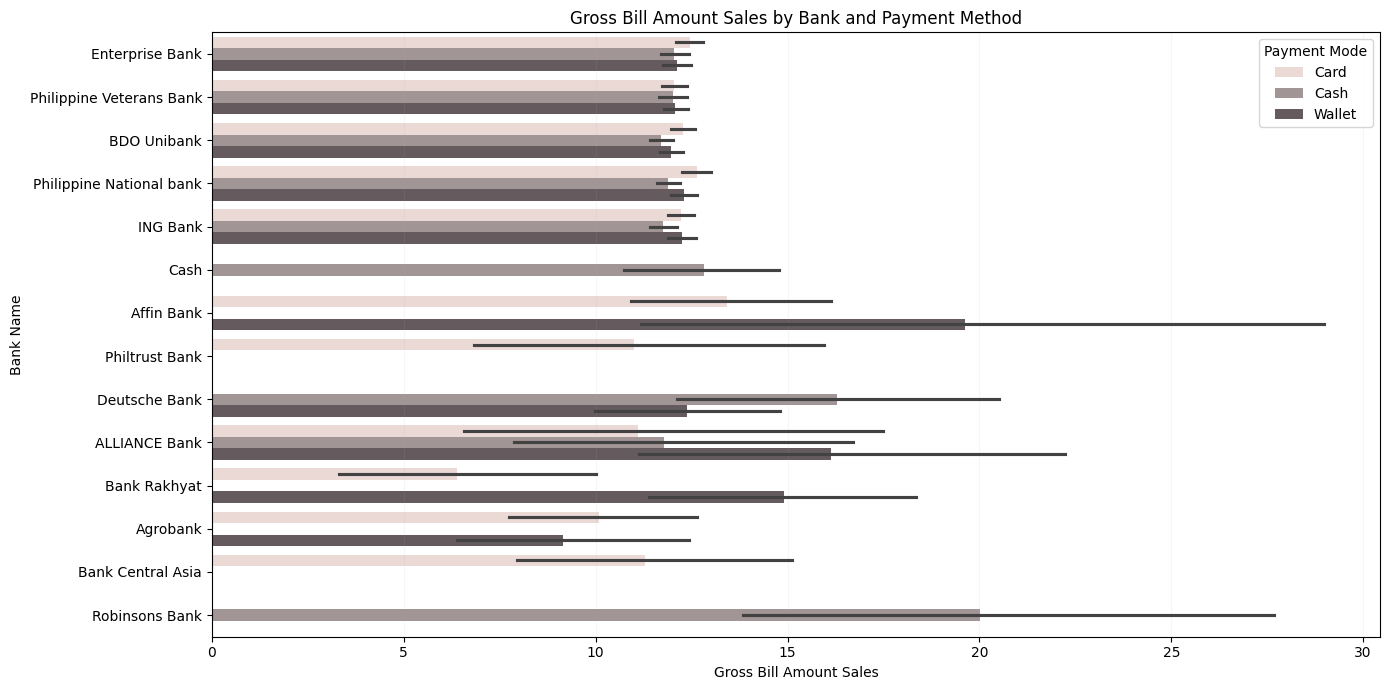

In [39]:
payment_mode_colors = {
    'Card': '#EED6D3',
    'Cash': '#A49393',
    'Wallet': '#67595E'
}

# Побудова графіка
plt.figure(figsize=(14, 7))
sns.barplot(x='Gross Bill Amount Sales', y='Bank Name', data=df, palette=payment_mode_colors, hue='Payment Mode')

plt.title('Gross Bill Amount Sales by Bank and Payment Method')
plt.xlabel('Gross Bill Amount Sales')
plt.ylabel('Bank Name')
plt.legend(title='Payment Mode')
plt.grid(axis='x', alpha=0.1)

# Відображення графіка
plt.tight_layout()
plt.show()


*   В розрізі кількості покупок:




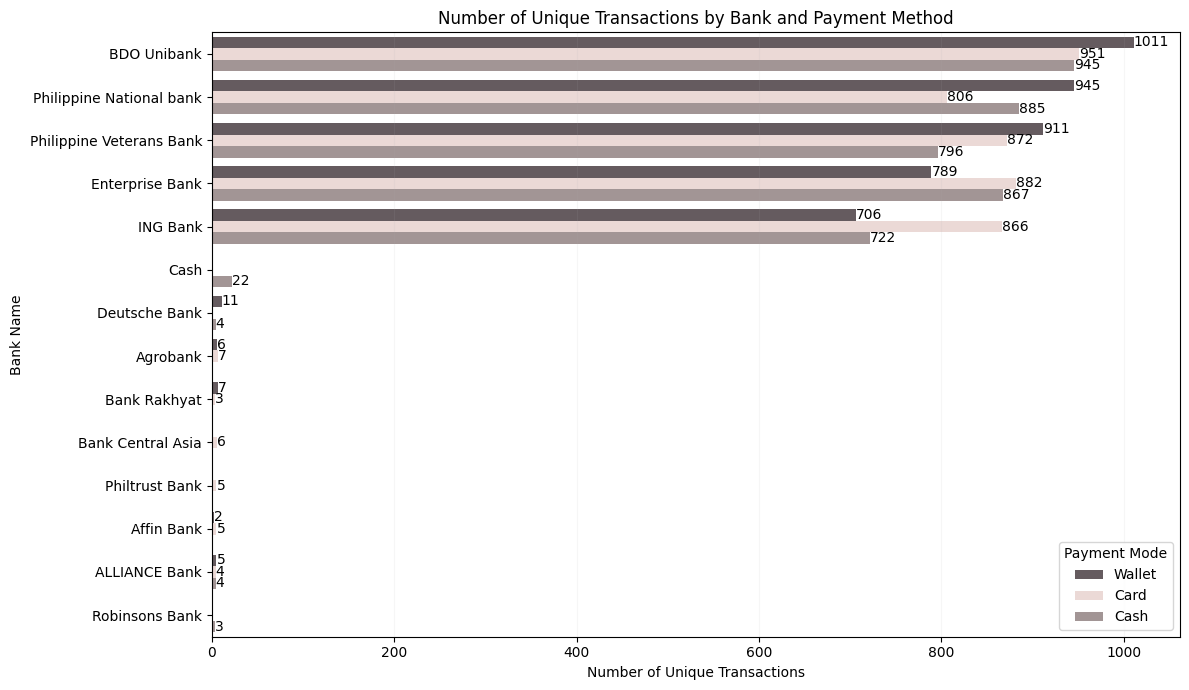

In [40]:
# Підрахунок кількості унікальних чеків для кожного банку та методу оплати
transaction_counts = df.groupby(['Bank Name', 'Payment Mode'])['Receipt Number'].nunique().reset_index(name='Unique Transactions Count')

transaction_counts_sorted = transaction_counts.sort_values(by='Unique Transactions Count', ascending=False)

# Побудова графіка
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Unique Transactions Count', y='Bank Name', data=transaction_counts_sorted, palette=payment_mode_colors, hue='Payment Mode')

plt.title('Number of Unique Transactions by Bank and Payment Method')
plt.xlabel('Number of Unique Transactions')
plt.ylabel('Bank Name')
plt.grid(axis='x', alpha=0.1)

# Додавання підписів
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Переміщення легенди в правий нижній кут
plt.legend(title='Payment Mode', loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()

*Висновок: клієнти активно використовують всі три методи оплати. З графіків видно ТОП банків.
Далі -в залежності від стратегії, якщо необхідно налагодити нові партнерства з банками чи простимулювати існуючі, то можна впровадити кешбеки від покупок,бонуси/обмін на товар чи інші додаткові "плюшки".
Якщо треба залучити кеш, то "навантажити" покупців таким чином, що при розрахунку картою буде списуватись ще додатково 2% від суми покупки(розмір коміссії банку) і відповідно оплата готівкою буду дешевше.*

**11 Питання: Розглянемо середній чек чоловіків та жінок**

In [41]:
average_receipt_by_gender = df.groupby('Gender')['Gross Bill Amount Sales'].mean().reset_index()
print(average_receipt_by_gender)

   Gender  Gross Bill Amount Sales
0  Female                12.166734
1    Male                11.891636


Перевіримо, чи є ця різниця статистично значимою.Використаємо статистий тест z-test. Рівень статистичної значущості alpha = 0.05.

*   Нульова гіпотеза - середні чеки жінок та чоловіків не віжрізняються
*   Альтернативна гіпотеза -середні чеки чоловіків та жінок суттєво відрізняються


In [44]:
# Фільтрація даних для кожної групи
male_data = df[df['Gender'] == 'Male']['Gross Bill Amount']
female_data = df[df['Gender'] == 'Female']['Gross Bill Amount']

# Обчислення середнього, стандартного відхилення та кількості спостережень
mean_male = male_data.mean()
mean_female = female_data.mean()
std_male = male_data.std()
std_female = female_data.std()
n_male = len(male_data)
n_female = len(female_data)

# Обчислення Z-статистики
z_score = (mean_male - mean_female) / ((std_male**2/n_male + std_female**2/n_female)**0.5)

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
alpha = 0.05

if p_value < alpha:
    print("Різниця між середніми чеками статистично значуща (відхиляємо нульову гіпотезу).")
else:
    print("Різниця між середніми чеками не є статистично значущою (не відхиляємо нульову гіпотезу).")

print(f'Z-score: {z_score}, p-value: {p_value}')

Різниця між середніми чеками статистично значуща (відхиляємо нульову гіпотезу).
Z-score: -4.529121792834478, p-value: 5.922935204516477e-06


*Висновок: р-value = 5.923 значно менше рівня значущості alpha=0.05, що означає, що ми відхиляємо нульову гіпотезу.
Це свідчить про те, що середні значення чеків для чоловіків і жінок дійсно відрізняються, і ця різниця не є випадковою. Для бізнесу це може бути важливою інформацією для прийняття рішень щодо маркетингових стратегій. Можна розробити цільові акції та пропозиції, орієнтовані на жінок, щоб збільшити продажі.*

**12 Питяння: Переглянемо чи були якісь великі покупки**

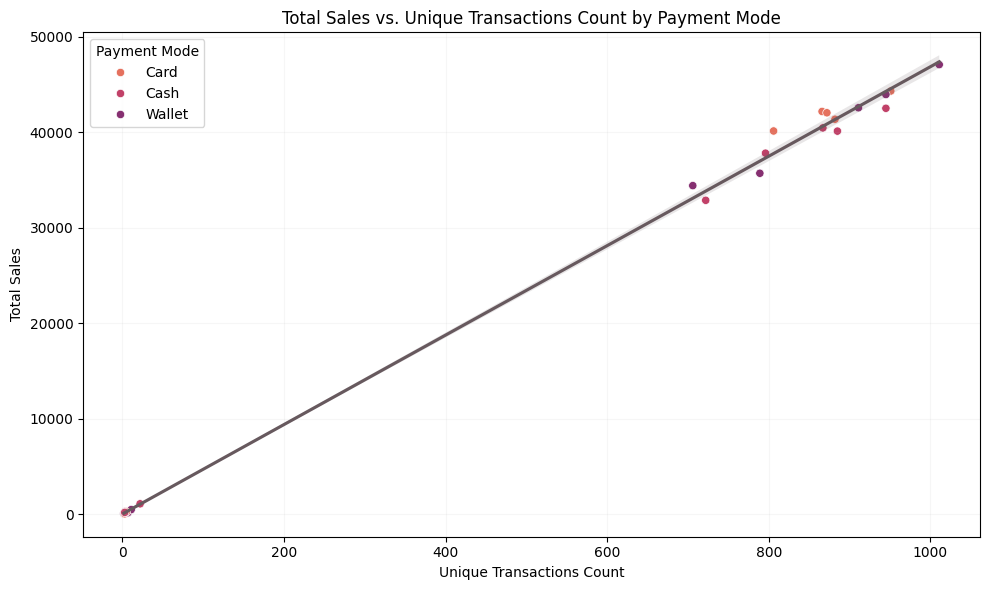

In [45]:
transaction_sums = df.groupby(['Bank Name', 'Payment Mode'])['Gross Bill Amount Sales'].sum().reset_index(name='Total Sales')
transaction_data = pd.merge(transaction_counts, transaction_sums, on=['Bank Name', 'Payment Mode'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unique Transactions Count', y='Total Sales', data=transaction_data, hue='Payment Mode', palette='flare')
sns.regplot(x='Unique Transactions Count', y='Total Sales', data=transaction_data, scatter=False, color='#67595E')

plt.title('Total Sales vs. Unique Transactions Count by Payment Mode')
plt.xlabel('Unique Transactions Count')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.1)


plt.tight_layout()
plt.show()


*Висновок: великих одноразових покупок не було.*